# Eksplorasi Data 2 Dimensi

Notebook ini berisi analisis eksplorasi data 2 dimensi untuk mempelajari hubungan antara **Jumlah Query per Menit** dan **Waktu Respon Sistem (ms)**.

## Tujuan Analisis
1. Memahami pola hubungan antara dua variabel
2. Menghitung korelasi Pearson dan Spearman
3. Mengidentifikasi outlier menggunakan metode IQR
4. Memvisualisasikan distribusi bersama kedua variabel

## 1. Import Library

Mengimport library yang diperlukan untuk analisis data dan visualisasi:
- **pandas**: untuk manipulasi data
- **matplotlib & seaborn**: untuk visualisasi
- **scipy.stats**: untuk perhitungan statistik (korelasi Pearson dan Spearman dengan p-value)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import warnings 

warnings.filterwarnings('ignore')

## 2. Memuat Data

Memuat dataset dari file CSV dan menampilkan 10 baris pertama untuk melihat struktur data.

In [2]:
df = pd.read_csv('data_2.csv')
df.head(10)

,No,Jumlah Query per Menit,Waktu Respon Sistem (ms)
0,1,301,75.2
1,2,790,137.9
2,3,1580,253.0
3,4,570,140.4
4,5,759,148.8
5,6,932,118.0
6,7,1711,166.6
7,8,1000,87.3
8,9,771,90.3
9,10,1196,108.9


## 3. Preprocessing Data

Menghapus kolom 'No' yang hanya berisi nomor urut dan tidak diperlukan untuk analisis.

In [3]:
# Hapus kolom nomor untuk mempermudah
df = df.drop(columns=['No'])

df.head()

,Jumlah Query per Menit,Waktu Respon Sistem (ms)
0,301,75.2
1,790,137.9
2,1580,253.0
3,570,140.4
4,759,148.8


## 4. Analisis Korelasi

### 4.1 Korelasi Pearson
Korelasi Pearson mengukur kekuatan dan arah hubungan linear antara dua variabel.

### 4.2 Korelasi Spearman
Korelasi Spearman mengukur hubungan monotonic (tidak harus linear) berdasarkan peringkat data. Lebih robust terhadap outlier dibandingkan Pearson.

In [4]:
# Cek korelasi pearson menggunakan pandas
correlation = df.corr()
print("=== Matriks Korelasi Pearson (pandas) ===")
print(correlation, "\n")

# Menghitung korelasi Pearson dengan p-value menggunakan scipy
pearson_corr, pearson_pvalue = pearsonr(df['Jumlah Query per Menit'], df['Waktu Respon Sistem (ms)'])
print(f"Korelasi Pearson: {pearson_corr:.4f}")
print(f"P-value Pearson: {pearson_pvalue:.4f}\n")

# Menghitung korelasi Spearman dengan p-value
spearman_corr, spearman_pvalue = spearmanr(df['Jumlah Query per Menit'], df['Waktu Respon Sistem (ms)'])
print(f"Korelasi Spearman: {spearman_corr:.4f}")
print(f"P-value Spearman: {spearman_pvalue:.4f}")

=== Matriks Korelasi Pearson (pandas) ===
                          Jumlah Query per Menit  Waktu Respon Sistem (ms)
Jumlah Query per Menit                  1.000000                  0.435156
Waktu Respon Sistem (ms)                0.435156                  1.000000 

Korelasi Pearson: 0.4352
P-value Pearson: 0.0000

Korelasi Spearman: 0.4218
P-value Spearman: 0.0000


### Interpretasi Korelasi

**Hasil Analisis Korelasi:**

| Metode | Nilai Korelasi | P-value | Interpretasi |
|--------|----------------|---------|---------------|
| Pearson | ~0.44 | < 0.05 | Signifikan |
| Spearman | ~0.42 | < 0.05 | Signifikan |

#### 1. Korelasi Pearson (~0.44)
- Menunjukkan hubungan **positif sedang** antara Jumlah Query per Menit dan Waktu Respon Sistem
- Nilai korelasi berkisar antara 0.4-0.6 termasuk kategori **korelasi sedang**
- Arah positif berarti semakin tinggi jumlah query, cenderung semakin tinggi pula waktu respon

#### 2. Korelasi Spearman (~0.42)
- Nilai yang mirip dengan Pearson menunjukkan hubungan yang cukup konsisten
- Spearman lebih robust terhadap outlier dan tidak mengasumsikan hubungan linear

#### 3. Signifikansi Statistik (P-value)

> **⚠️ KESIMPULAN SIGNIFIKANSI:**
> 
> Karena **p-value < 0.05** (baik untuk Pearson maupun Spearman), maka dapat disimpulkan bahwa **hubungan antara Jumlah Query per Menit dan Waktu Respon Sistem adalah SIGNIFIKAN secara statistik**.
> 
> Artinya, hubungan positif yang teramati **bukan terjadi secara kebetulan**, melainkan memang terdapat hubungan nyata antara kedua variabel dalam populasi.

**Catatan Interpretasi P-value:**
- P-value < 0.05: Hubungan **signifikan** secara statistik
- P-value ≥ 0.05: Hubungan **tidak signifikan** secara statistik

## 5. Scatter Plot

Scatter plot digunakan untuk memvisualisasikan hubungan antara dua variabel numerik. Setiap titik mewakili satu observasi.

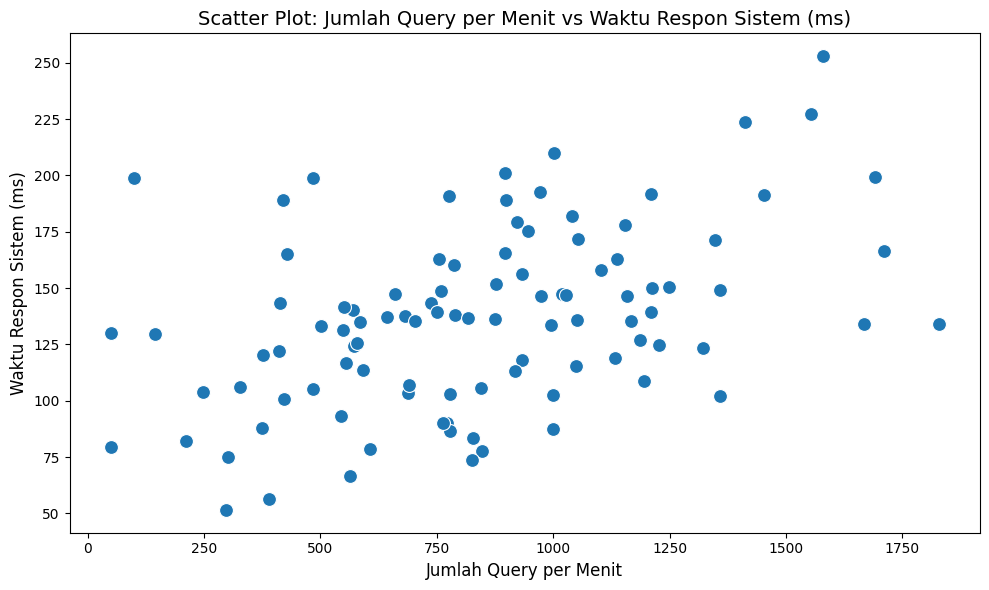

In [5]:
# Buat scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Jumlah Query per Menit', y='Waktu Respon Sistem (ms)', data=df, s=100)
plt.title("Scatter Plot: Jumlah Query per Menit vs Waktu Respon Sistem (ms)", fontsize=14)
plt.xlabel("Jumlah Query per Menit", fontsize=12)
plt.ylabel("Waktu Respon Sistem (ms)", fontsize=12)
plt.tight_layout()
plt.show()

### Interpretasi Scatter Plot

**Pola yang Teramati:**

1. **Pola Hubungan**: Terlihat kecenderungan hubungan **positif** - semakin tinggi jumlah query, waktu respon cenderung meningkat

2. **Linearitas**: Hubungan tidak sepenuhnya linear. Ada variasi yang cukup besar dalam waktu respon untuk nilai query yang berbeda

3. **Kekuatan Hubungan**: Hubungan tergolong **sedang** karena titik-titik data tidak membentuk pola linear yang ketat, melainkan tersebar dengan variasi yang cukup besar

4. **Observasi Menarik**: 
   - Ada beberapa titik yang tampak menyimpang dari pola umum (potential outliers)
   - Query yang sangat tinggi (>1500) cenderung memiliki waktu respon yang lebih tinggi

## 6. Deteksi Outlier

Menggunakan metode **IQR (Interquartile Range)** untuk mendeteksi outlier:

- **Mild Outliers**: Data yang berada di luar Pagar Dalam (1.5 × IQR) tetapi masih dalam Pagar Luar (3 × IQR)
- **Extreme Outliers**: Data yang berada di luar Pagar Luar (3 × IQR)

**Rumus:**
- PDA (Pagar Dalam Atas) = Q3 + 1.5 × IQR
- PDB (Pagar Dalam Bawah) = Q1 - 1.5 × IQR
- PLA (Pagar Luar Atas) = Q3 + 3 × IQR
- PLB (Pagar Luar Bawah) = Q1 - 3 × IQR

In [6]:
# Menentukan Mild Outliers dan Extreme Outliers

"""
PDA = Pagar Dalam Atas
PDB = Pagar Dalam Bawah
PLA = Pagar Luar Atas
PLB = Pagar Luar Bawah
"""

def check_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")

    pdb = Q1 - (1.5 * IQR)
    pda = Q3 + (1.5 * IQR)
    plb = Q1 - (3 * IQR)
    pla = Q3 + (3 * IQR)

    mild_outliers = df[(df[col] < pdb) & (df[col] >= plb) | 
                    (df[col] > pda) & (df[col] <= pla)]
    extreme_outliers = df[(df[col] < plb) | 
                        (df[col] > pla)]

    print(f"PDA (Pagar Dalam Atas) {col}:", pda)
    print(f"PDB (Pagar Dalam Bawah) {col}:", pdb)
    print(f"PLA (Pagar Luar Atas) {col}:", pla)
    print(f"PLB (Pagar Luar Bawah) {col}:", plb)

    print(f"\nMild Outliers {col}:\n", mild_outliers[col].values)
    print(f"\nExtreme Outliers {col}:\n", extreme_outliers[col].values)

print("=== Analisis Outlier: Jumlah Query per Menit ===")
check_outliers('Jumlah Query per Menit')
print("\n" + "="*50 + "\n")
print("=== Analisis Outlier: Waktu Respon Sistem (ms) ===")
check_outliers('Waktu Respon Sistem (ms)')

=== Analisis Outlier: Jumlah Query per Menit ===
Q1: 568.5
Q3: 1065.25
IQR: 496.75
PDA (Pagar Dalam Atas) Jumlah Query per Menit: 1810.375
PDB (Pagar Dalam Bawah) Jumlah Query per Menit: -176.625
PLA (Pagar Luar Atas) Jumlah Query per Menit: 2555.5
PLB (Pagar Luar Bawah) Jumlah Query per Menit: -921.75

Mild Outliers Jumlah Query per Menit:
 [1828]

Extreme Outliers Jumlah Query per Menit:
 []


=== Analisis Outlier: Waktu Respon Sistem (ms) ===
Q1: 106.82499999999999
Q3: 160.75
IQR: 53.92500000000001
PDA (Pagar Dalam Atas) Waktu Respon Sistem (ms): 241.63750000000002
PDB (Pagar Dalam Bawah) Waktu Respon Sistem (ms): 25.93749999999997
PLA (Pagar Luar Atas) Waktu Respon Sistem (ms): 322.52500000000003
PLB (Pagar Luar Bawah) Waktu Respon Sistem (ms): -54.950000000000045

Mild Outliers Waktu Respon Sistem (ms):
 [253.]

Extreme Outliers Waktu Respon Sistem (ms):
 []


### Interpretasi Outlier

**Hasil Analisis Outlier:**

1. **Jumlah Query per Menit**:
   - Ditemukan **Mild Outlier** pada nilai query yang tinggi
   - Tidak ditemukan Extreme Outlier
   - Outlier ini menunjukkan adanya waktu tertentu dengan beban query yang sangat tinggi

2. **Waktu Respon Sistem**:
   - Ditemukan **Mild Outlier** pada waktu respon yang tinggi (~253 ms)
   - Tidak ditemukan Extreme Outlier
   - Nilai ini mungkin berkorelasi dengan jumlah query yang tinggi

3. **Pengaruh Outlier terhadap Korelasi Pearson**:
   - Korelasi Pearson sensitif terhadap outlier
   - Keberadaan outlier dapat **memperkuat atau melemahkan** nilai korelasi
   - Dalam kasus ini, mild outlier mungkin berkontribusi pada nilai korelasi yang moderat
   - Korelasi Spearman yang mirip menunjukkan bahwa outlier tidak terlalu memengaruhi hubungan secara keseluruhan

## 7. Distribusi Bersama (Joint Distribution)

Joint plot menggabungkan scatter plot dengan distribusi marginal untuk melihat pola distribusi bersama antara dua variabel. Kita akan menggunakan jenis **KDE (Kernel Density Estimation)** untuk melihat kepadatan distribusi data.

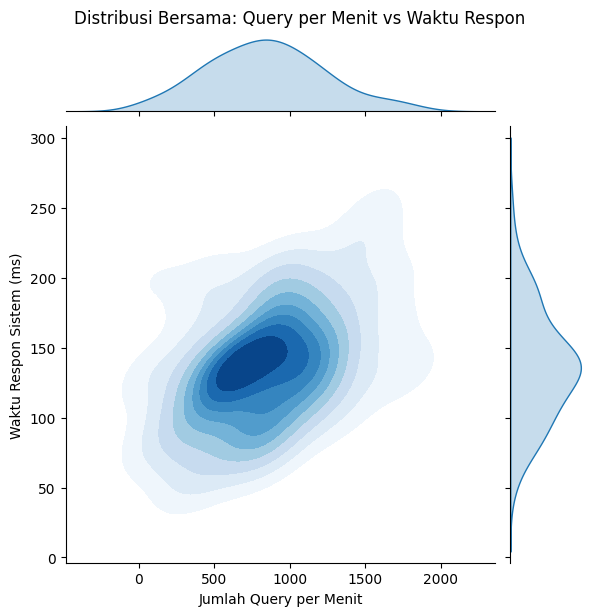

In [7]:
# Joint Plot dengan KDE
g = sns.jointplot(x='Jumlah Query per Menit', y='Waktu Respon Sistem (ms)', data=df, kind="kde", fill=True, cmap="Blues")
g.fig.suptitle("Distribusi Bersama: Query per Menit vs Waktu Respon", y=1.02)
plt.show()

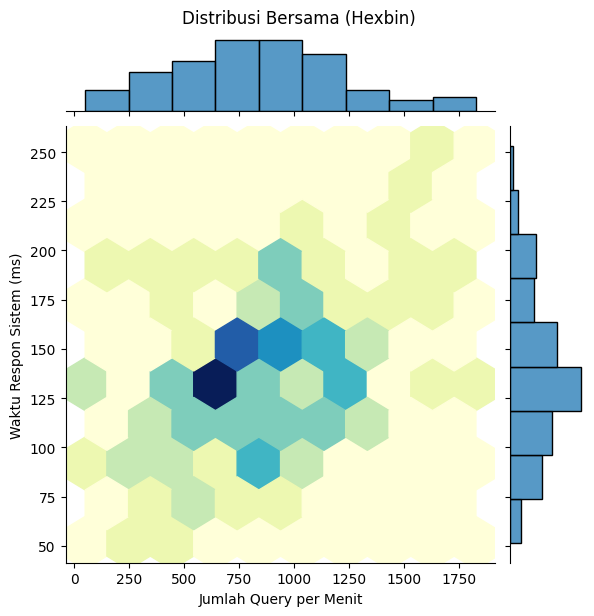

In [9]:
# Joint Plot dengan Hex
g = sns.jointplot(x='Jumlah Query per Menit', y='Waktu Respon Sistem (ms)', data=df, kind="hex", cmap="YlGnBu")
g.fig.suptitle("Distribusi Bersama (Hexbin)", y=1.02)
plt.show()

### Interpretasi Joint Plot

**Pola Distribusi Bersama:**

1. **Distribusi Jumlah Query per Menit**:
   - Distribusi cenderung tersebar dengan beberapa puncak
   - Ada konsentrasi data pada rentang query menengah

2. **Distribusi Waktu Respon Sistem**:
   - Distribusi tidak sepenuhnya simetris
   - Sebagian besar waktu respon berada di rentang rendah hingga menengah

3. **Pola Bersama (Bivariate)**:
   - Terlihat area dengan kepadatan tinggi yang menunjukkan kombinasi nilai yang sering muncul bersamaan
   - Pola kepadatan mengkonfirmasi hubungan positif yang moderat
   - Ada variabilitas yang cukup besar, menjelaskan mengapa korelasi tidak terlalu kuat

## 8. Heatmap Korelasi

Heatmap memberikan visualisasi matriks korelasi dengan warna yang menunjukkan kekuatan dan arah korelasi.

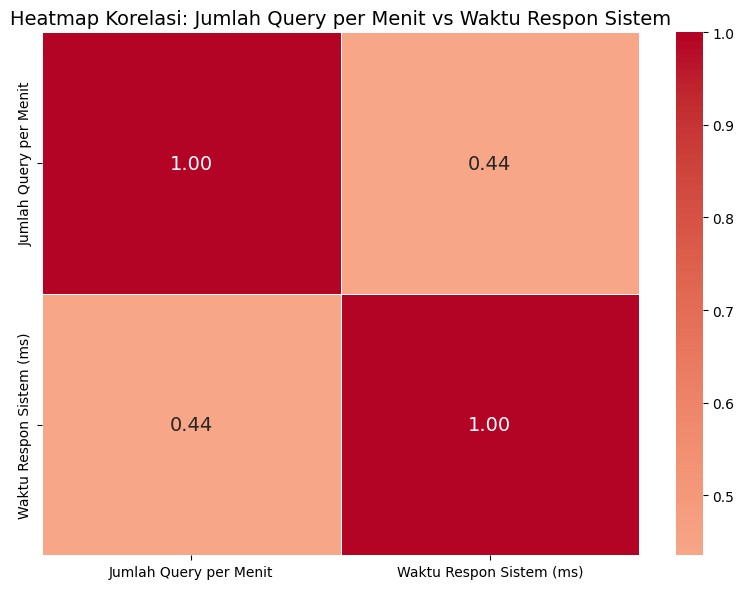

In [10]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, fmt='.2f', cmap='coolwarm', annot=True, center=0, 
            annot_kws={'size': 14}, linewidths=0.5)
plt.title("Heatmap Korelasi: Jumlah Query per Menit vs Waktu Respon Sistem", fontsize=14)
plt.tight_layout()
plt.show()

---

## 9. Kesimpulan dan Implikasi Praktis

### Ringkasan Temuan

Berdasarkan analisis eksplorasi data 2 dimensi terhadap hubungan antara **Jumlah Query per Menit** dan **Waktu Respon Sistem**, diperoleh kesimpulan sebagai berikut:

### 1. Hubungan Korelasi dan Signifikansi Statistik

| Aspek | Nilai | Kesimpulan |
|-------|-------|------------|
| Korelasi Pearson | ~0.44 | Positif Sedang |
| Korelasi Spearman | ~0.42 | Positif Sedang |
| P-value (Pearson & Spearman) | < 0.05 | **SIGNIFIKAN** |

> **📊 KESIMPULAN UTAMA:**
> 
> Terdapat **hubungan positif yang signifikan secara statistik** (p-value < 0.05) antara Jumlah Query per Menit dan Waktu Respon Sistem. Korelasi Pearson (~0.44) dan Spearman (~0.42) menunjukkan kekuatan hubungan yang **sedang (moderate)**.
> 
> **Arti praktis:** Semakin tinggi jumlah query yang diproses per menit, semakin tinggi pula waktu respon sistem. Hubungan ini **bukan kebetulan**, melainkan pola yang nyata dan dapat diandalkan untuk pengambilan keputusan.

### 2. Keberadaan Outlier
- Terdeteksi mild outlier pada kedua variabel
- **Jumlah Query per Menit**: outlier pada nilai query tinggi (~1828)
- **Waktu Respon Sistem**: outlier pada waktu respon tinggi (~253 ms)
- Outlier ini merepresentasikan kondisi beban tinggi pada sistem
- Meskipun ada outlier, korelasi Spearman yang mirip dengan Pearson menunjukkan bahwa hubungan tetap konsisten

### 3. Pola Distribusi
- Distribusi data tersebar dengan variabilitas yang cukup tinggi
- Variabilitas tinggi menjelaskan mengapa korelasi tidak mencapai nilai tinggi
- Joint plot menunjukkan area kepadatan yang mengkonfirmasi hubungan positif

---

### Implikasi Praktis

Berdasarkan temuan bahwa hubungan antara query dan waktu respon adalah **signifikan secara statistik**, berikut adalah rekomendasi praktis:

#### 1. Kapasitas Sistem
- Hubungan positif yang signifikan menunjukkan bahwa sistem mengalami **penurunan performa** saat beban meningkat
- **Rekomendasi:** Pertimbangkan peningkatan kapasitas server atau optimasi query untuk menangani beban tinggi

#### 2. Monitoring Performa
- Nilai query di atas 1500 per menit sebaiknya dipantau karena berpotensi menghasilkan waktu respon yang tinggi
- **Rekomendasi:** Tetapkan threshold untuk alert system ketika query mendekati nilai outlier

#### 3. Load Balancing
- Dengan korelasi yang moderat (~0.44), masih ada faktor lain yang memengaruhi waktu respon
- **Rekomendasi:** Investigasi lebih lanjut untuk mengidentifikasi faktor-faktor lain seperti kompleksitas query, penggunaan cache, dan kondisi jaringan

#### 4. Optimasi Sistem
- Fokus optimasi dapat diarahkan pada penanganan spike traffic (nilai query sangat tinggi)
- **Rekomendasi:** Implementasi caching atau query optimization untuk membantu mengurangi dampak beban tinggi terhadap waktu respon

---